## Librerías a importar

In [1]:
# Importamos las librerias que usaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# FASE 1: Recolección y carga

Cargamos los datos de los dos CSVs que vamos a utilizar.




In [3]:
# Importamos el csv principal y visualizamos las primeras filas
df = pd.read_csv('telecomunicaciones.csv')
print("Dataset principal:")
print(df.head())
print()

# Importamos el csv complementario y visualizamos las primeras filas
dfciu = pd.read_csv('California_DemographicsByCity_sample.csv')
print("Dataset complementario:")
print(dfciu.head())

Dataset principal:
  Customer ID  Genero  Edad Debajo 30 Persona Mayor Casado Dependiente  \
0  8779-QRDMV    Male    78        No           Yes     No          No   
1  7495-OOKFY  Female    74        No           Yes    Yes         Yes   
2  1658-BYGOY    Male    71        No           Yes     No         Yes   
3  4598-XLKNJ  Female    78        No           Yes    Yes         Yes   
4  4846-WHAFZ  Female    80        No           Yes    Yes         Yes   

   Número de Dependientes           País      Estado  ...  \
0                       0  United States  California  ...   
1                       1  United States  California  ...   
2                       3  United States  California  ...   
3                       1  United States  California  ...   
4                       1  United States  California  ...   

  Cargos totales por datos extra  Cargos totales por larga distancia  \
0                             20                                 0.0   
1                        

# FASE 2: Preparación, limpieza y manipulación

### **Eliminación de columnas**

Se eliminan todas aquellas columnas que no resulten útiles, ya sea porque todos los datos de la columna son iguales o porque no las vamos a utilizar para analizar la retención de clientes.

In [4]:
# Mostramos el número de columnas iniciales del dataframe y sus nombres
print(f"Número de columnas del dataframe incial: {len(df.columns)}")
print("El nombre de las columnas del dataframe incial:")
print(df.columns)
print()

# Buscamos las columnas con todos los datos iguales para eliminarlas
df.select_dtypes(include='object').nunique()
print("Número de datos diferentes que tiene cada columna:")
print(df.select_dtypes(include='object').nunique())
print()

# Eliminamos las columnas que no vamos a utilizar
df=df.drop(columns=['Debajo 30',
                    'Persona Mayor',
                    'Dependiente',
                    'País',
                    'Estado',
                    'Código Postal',
                    'Latitud',
                    'Longitud',
                    'Población',
                    'Trimestre',
                    'Recomendo a un amigo',
                    'Factura sin papel',
                    'Cargos promedio mensuales de larga distancia',
                    'Ingresos totales',
                    'Etiqueta de churn',
                    'Puntuación de churn',
                    'Valor de vida del cliente',
                    'Motivo de abandono'])

# Mostramos el número de columnas del dataframe tras la eliminación y sus nombres
print(f"Número de columnas del dataframe tras la eliminación: {len(df.columns)}")
print("El nombre de las columnas del dataframe tras la eliminación:")
print(df.columns)

Número de columnas del dataframe incial: 50
El nombre de las columnas del dataframe incial:
Index(['Customer ID', 'Genero', 'Edad', 'Debajo 30', 'Persona Mayor', 'Casado',
       'Dependiente', 'Número de Dependientes', 'País', 'Estado', 'Ciudad',
       'Código Postal', 'Latitud', 'Longitud', 'Población', 'Trimestre',
       'Recomendo a un amigo', 'Número de Referidos', 'Antiguedad en Meses',
       'Oferta', 'Servicio Telefónico',
       'Cargos promedio mensuales de larga distancia', 'Líneas Múltiples',
       'Servicio de Internet', 'Tipo de Internet',
       'Descarga mensual promedio en GB', 'Seguridad en línea',
       'Copia de seguridad en línea', 'Plan de Protección de Dispositivos',
       'Soporte Técnico Premium', 'Streaming de TV',
       'Transmisión de películas', 'Música en streaming', 'Datos ilimitados',
       'Contrato', 'Factura sin papel', 'Metodo de pago', 'Cargo mensual',
       'Cargos totales', 'Reembolsos totales',
       'Cargos totales por datos extra', 'C

###**Tratamiento de valores nulos**
Se identifican los valores nulos y se rellenan de manera coherente.



In [5]:
# Identificamos las columnas que presentan algún valor nulo
print("Las columnas que presentan algún valor nulo son:")
print(df.columns[df.isnull().any()])
print()

# Sustituimos los valores nulos que aparecen en las columnas identificadas
df["Categoría de churn"] = df["Categoría de churn"].fillna("No")
df["Tipo de Internet"] = df["Tipo de Internet"].fillna("No internet")
df["Oferta"] = df["Oferta"].fillna("Sin oferta")
print("Las columnas que presentan algún valor nulo tras el tratamiento son:")
print(df.columns[df.isnull().any()])

Las columnas que presentan algún valor nulo son:
Index(['Oferta', 'Tipo de Internet', 'Categoría de churn'], dtype='object')

Las columnas que presentan algún valor nulo tras el tratamiento son:
Index([], dtype='object')


###**Tratamiento de outliers**

Genereamos una función de limpieza que aplicamos sobre la variable "Cargos totales por larga distancia" porque contenía muchos valores no válidos. Estos valores serán sustituídos por el valor 4000.


In [6]:
def limpieza(elemento):
  # Si el número es muy largo, quitamos los puntos y lo reducimos
  if len(elemento) > 7:
    elemento = elemento.replace(".","")
    elemento = (float(elemento) / 10000000000000)
  # Si el elemento no es largo, simplemente lo pasamos a float
  else:
    elemento = float(elemento)

  # Limitamos valores demasiado altos a 4000 para evitar outliers extremos
  if elemento > 4000:
    elemento = 4000

  return elemento

In [7]:
# Aplicamos la función limpieza a la columna de cargos de larga distancia
df['Cargos totales por larga distancia'] = df['Cargos totales por larga distancia'].apply(limpieza)
# Mostramos la columna ya limpia para comprobar que funciona bien
print("La columna de \"Cargos totales por larga distancia\" tras la limpieza:")
print(df['Cargos totales por larga distancia'])


La columna de "Cargos totales por larga distancia" tras la limpieza:
0          0.00
1        390.80
2        203.94
3       4000.00
4        234.21
         ...   
7038    1639.44
7039     865.20
7040    2135.52
7041       0.00
7042    2043.36
Name: Cargos totales por larga distancia, Length: 7043, dtype: float64


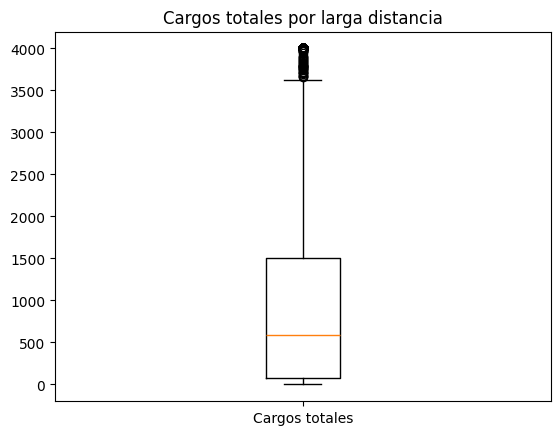

In [8]:
# Creamos un boxplot para ver mejor los valores extremos de "Cargos totales por larga distancia"
# (esto nos ayuda a comprobar si la limpieza ha funcionado y si aún quedan outliers fuertes)
fig, ax = plt.subplots()
ax.boxplot(df['Cargos totales por larga distancia'])
ax.set_title("Cargos totales por larga distancia")
ax.set_xticklabels(["Cargos totales"])
plt.show()

###**Creación de nuevas variables**

Se crean una serie de variables nuevas a partir de las variables que ya exixtían.

1. Variable demográfica de los clientes

In [9]:
# Nos quedamos con la columna de ciudad y la de población
dfciu = dfciu[['Geography', dfciu.columns[5]]]

# Renombramos las columnas
dfciu = dfciu.rename(columns={'Unnamed: 5': 'Poblacion','Geography':'Ciudad'})

# Quitamos filas con valores nulos
dfciu = dfciu.dropna()

# Eliminamos la fila que venía mal
dfciu = dfciu.drop(index=3)

# Convertimos la población a número
dfciu['Poblacion'] = dfciu['Poblacion'].astype(int)

# Limpiamos el nombre de la ciudad
# Se eliminan las palabras finales que aparecen despues de cada nombre de ciudad para posibilitar el merge
dfciu['Ciudad'] = dfciu['Ciudad'].str.replace(r'\b(CDP|city|town|village)\b', '', regex=True) #Función extraída de Chat GPT
#Se eliminan espacios en blanco al final y al principio de cada ciudad
dfciu['Ciudad'] = dfciu['Ciudad'].str.strip()
dfciu['Ciudad'] = dfciu['Ciudad'].str.replace(r'\s+', ' ', regex=True) #Función extraída de Chat GPT

# Ordenamos por población (de mayor a menor)
dfciu = dfciu.sort_values(by='Poblacion', ascending=False)

# Unimos con el DataFrame principal
df = df.merge(dfciu[['Ciudad', 'Poblacion']], on='Ciudad', how='left')

In [10]:
# Sustituimos valores nulos por un numero aleatorio que se genere a traves de la media y la desviación estándar de la columna población
# Mostramos la columna de población para ver si hay valores nulos o raros
print("La columna población antes del tratmiento de valores nulos:")
print(df['Poblacion'])

# Calculamos la media de población (sin contar nulos)
media_pob = df['Poblacion'].mean(numeric_only=True)
print("\nMedia de población:", media_pob)

# Calculamos la desviación estándar de la población (sin contar nulos)
desv_pob = df['Poblacion'].std(numeric_only=True)
print("\nDesviación estándar:", desv_pob)

# Función que sustituye valores nulos por un número aleatorio basado en media y desviación típica
def randnum(x):
  # Si está vacío, genera un valor aleatorio siguiendo una distribución normal
  if pd.isnull(x):
    x = abs(np.random.normal(loc=media_pob, scale=desv_pob))
  # Si por algún motivo queda como 0, se cambia a 1 para evitar problemas
  if x == 0:
    x=1
  return x

# Aplicamos la función a toda la columna de población
df['Poblacion'] = df['Poblacion'].apply(randnum)

# Pasamos la población a número entero
df['Poblacion']=df['Poblacion'].astype(int)

# Mostramos cómo queda la columna tras el tratmiento de valores nulos
print("\nLa columna población tras el tratmiento de valores nulos:")
print(df['Poblacion'])

La columna población antes del tratmiento de valores nulos:
0       3878704.0
1       3878704.0
2       3878704.0
3        102774.0
4         85589.0
          ...    
7125          NaN
7126      37941.0
7127          NaN
7128          NaN
7129      75029.0
Name: Poblacion, Length: 7130, dtype: float64

Media de población: 352379.68973322556

Desviación estándar: 853901.7977197899

La columna población tras el tratmiento de valores nulos:
0       3878704
1       3878704
2       3878704
3        102774
4         85589
         ...   
7125     215091
7126      37941
7127    1060903
7128     106363
7129      75029
Name: Poblacion, Length: 7130, dtype: int64


In [11]:
# Creamos la variable escala que mide a los clientes según la cantidad de habitantes que tiene el municipio donde viven del 1 (rural) al 5(urbano)
def clasificar_segmento(p):
    if p < 2000:         #Pueblos muy pequeños
        return 1
    elif p < 10000:      #Municipios pequeños
        return 2
    elif p < 50000:      #Ciudades medianas
        return 3
    elif p < 500000:     #Ciudades grandes
        return 4
    else:                #Grandes áreas urbanas
        return 5

#Cremos la nueva columna aplicando la función a la población
df['Seg_pob'] = df['Poblacion'].apply(clasificar_segmento)
# Mostramos cuántos clientes hay en cada tipo de zona
print("Número de clientes en cada tipo de zona:")
print(df['Seg_pob'].value_counts())


Número de clientes en cada tipo de zona:
Seg_pob
4    2412
5    1520
1    1293
3    1097
2     808
Name: count, dtype: int64


5. Variable que relaciona los clientes y los descuentos

In [12]:
#Índice de dependencia de descuentos
def calcular_indice_descuentos(df):
    #Reemplazar nulos por 0 para evitar errores
    df[["Reembolsos totales", "Cargos totales"]] = df[["Reembolsos totales", "Cargos totales"]].fillna(0)
    #Índice: cuánto porcentaje del dinero se ha descontado
    df["indice_descuentos"] = df["Reembolsos totales"] / (df["Cargos totales"] + 1)  #+1 para evitar división entre 0
    return df

#Aplicamos la función
df = calcular_indice_descuentos(df)

# Mostramos la columna nueva junto con las originales
print(df[["Reembolsos totales", "Cargos totales", "indice_descuentos"]])
print()

# Clasificamos a los clientes según cuánto dependen de los descuentos
def clasificar_descuento(valor):
    if 0.0 <= valor <= 0.1:        # Casi no recibe descuentos
        return "No depende de descuentos"
    elif 0.1 < valor <= 0.3:       # Recibe algunos descuentos
        return "Depende algo"
    else:                          # Recibe muchos descuentos: posible riesgo
        return "Muy dependiente (riesgo churn)"

#Creamos la columna con la categoría
df["categoria_descuento"] = df["indice_descuentos"].apply(clasificar_descuento)

# Contamos cuántos clientes hay en cada caso
conteo = df["categoria_descuento"].value_counts()
print("Número de clientes de cada tipo de catgeoría de descuento:")
print(conteo)


      Reembolsos totales  Cargos totales  indice_descuentos
0                   0.00           39.65           0.000000
1                   0.00          633.30           0.000000
2                  45.61         1752.55           0.026010
3                  13.43         2514.50           0.005339
4                   0.00         2868.15           0.000000
...                  ...             ...                ...
7125               19.31         1419.40           0.013595
7126               48.23         1990.50           0.024218
7127               45.38         7362.90           0.006162
7128               27.24          346.45           0.078400
7129                0.00         6844.50           0.000000

[7130 rows x 3 columns]

Número de clientes de cada tipo de catgeoría de descuento:
categoria_descuento
No depende de descuentos    7108
Depende algo                  22
Name: count, dtype: int64


6. Recodificación de las variables abandono y contrato

In [13]:
# Recodificamos la variable churn para usarla como número (0 = se queda, 1 = se va)
churn_bin = []
for estado in df["Estado del cliente"]:
    if estado == "Churned":
        churn_bin.append(1)
    else: # 'Stayed' y 'Joined'
        churn_bin.append(0)
df["churn_bin"] = churn_bin

# Pasamos el tipo de contrato a números para poder calcular correlaciones (0: contrato más corto, 2: contrato más largo)
tipo_contrato = []
for contrato in df['Contrato']:
    if contrato == 'Month-to-Month':
        tipo_contrato.append(0)
    elif contrato == 'One Year':
        tipo_contrato.append(1)
    else:  # 'Two Year'
        tipo_contrato.append(2)
df['tipo_contrato'] = tipo_contrato

Mapa de Correlación de los servicios y abandono

Con esto, se busca saber si hay alguna variable de la batería de variables dummies que influya mucho en el churn.

In [18]:
#Lista con todos los servicios que pueden tener los clientes
servicios = [
    'Servicio Telefónico',
    'Líneas Múltiples',
    'Servicio de Internet',
    'Seguridad en línea',
    'Copia de seguridad en línea',
    'Plan de Protección de Dispositivos',
    'Soporte Técnico Premium',
    'Streaming de TV',
    'Transmisión de películas',
    'Música en streaming',
    'Datos ilimitados'
]

# Recodificamos las variables servicios para usarla como número (0 = No, 1 = Yes)
# Función para convertir Yes/No en 1/0 para poder hacer cálculos
def oab (x):
  if x=='Yes':
    x=1
  else:
    x=0
  return x
# Aplicamos la función a todas las columnas de servicios
for elemento in servicios:
  df[elemento]=df[elemento].apply(oab)

# Añadimos churn_bin a la lista para ver si hay relación entre churn y servicios
servicios.append('churn_bin')

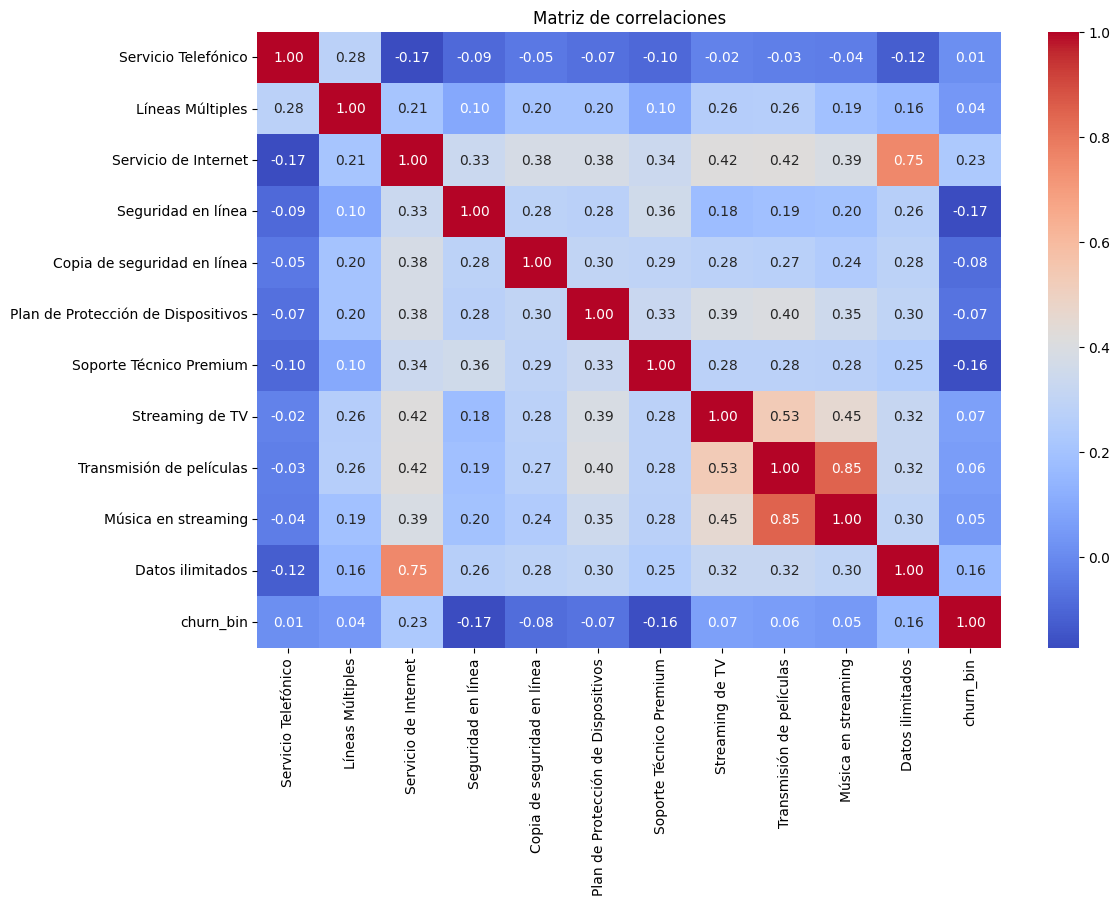

In [19]:
# Calculamos la matriz de correlaciones solo con estas columnas
corr1 = df[servicios].corr()

# Gráfica tipo heatmap para ver qué servicios están relacionados con el churn
plt.figure(figsize=(12,8))
sns.heatmap(corr1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

Como concluímos que no hay ninguna variable de dummie de servicios que influya mucho en la correlación, generamos la variable a partir del primer mapa de correlaciones

In [20]:
# Se crea una función que mide el valor que percibe el cliente de los servicios ofertados y otra que categoriza a los clientes en 3 categorías (en riesgo de irse, neutro y fiel)
def crear_indice_valor(df):
    # Normalizamos las variables para que no desequilibren la fórmula
    max_cargos = df["Cargos totales"].max()
    df["cargos_norm"] = df["Cargos totales"] / max_cargos

    max_dep = df["Número de Dependientes"].max()
    df["dep_norm"] = df["Número de Dependientes"] / max_dep

    max_ref = df["Número de Referidos"].max()
    df["ref_norm"] = df["Número de Referidos"] / max_ref

    max_sat = df["Puntuación de satisfacción"].max()
    df["sat_norm"] = df["Puntuación de satisfacción"] / max_sat

    max_ant = df["Antiguedad en Meses"].max()
    df["ant_norm"] = df["Antiguedad en Meses"] / max_ant

    max_con = df["tipo_contrato"].max()
    df["cont_norm"] = df["tipo_contrato"] / max_con

    # Creamos el índice combinando 6 variables (cada uno con un peso)
    df["indice_valor"] = (
        df["sat_norm"] * 0.75 / (0.75+0.35+0.20+0.22+0.29+0.43) +
        df["ant_norm"] * 0.35 / (0.75+0.35+0.20+0.22+0.29+0.43) +
        df["cargos_norm"] * 0.20 / (0.75+0.35+0.20+0.22+0.29+0.43) +
        df["dep_norm"] * 0.22 / (0.75+0.35+0.20+0.22+0.29+0.43)+
        df["ref_norm"] * 0.29 / (0.75+0.35+0.20+0.22+0.29+0.43)+
        df["cont_norm"] * 0.43 / (0.75+0.35+0.20+0.22+0.29+0.43)
    )
    return df

# Aplicamos la función para generar el índice
df = crear_indice_valor(df)

# Miramos la media del índice según el churn
df.groupby("Categoría de churn")["indice_valor"].mean()
# Guardamos el índice en una variable para calcular umbrales
df["indice_valor"]

# Calculamos la media y desviación estándar del índice
mu = df["indice_valor"].mean()
sigma = df["indice_valor"].std()

# Creamos los umbrales para separar clientes (media ± desviación)
umbral_bajo = mu - sigma
umbral_alto  = mu + sigma

def etiqueta(x):
  # Si está por debajo del umbral bajo, es un cliente en riesgo
  if x < umbral_bajo:
      return "En riesgo"
  # Si está por encima del umbral alto, es un cliente fiel
  elif x > umbral_alto:
      return "Fiel"
  # El resto son clientes neutros
  else:
      return "Neutro"

# Aplicamos la función para clasificar a cada cliente
df["categoria_cliente"] = df["indice_valor"].apply(etiqueta)
# Mostramos los umbrales utilizados
print(f"Umbrales: bajo={umbral_bajo:.3f}, alto={umbral_alto:.3f}")

# Mostramos un ejemplo de cómo queda cada cliente
print(df[["indice_valor", "categoria_cliente"]].head())
# Contamos cuántos clientes hay en cada categoría
print("\nEl número de clientes de cada categoría de clientes:")
print(df["categoria_cliente"].value_counts())


Umbrales: bajo=0.216, alto=0.608
   indice_valor categoria_cliente
0      0.203471         En riesgo
1      0.247447            Neutro
2      0.223747            Neutro
3      0.236715            Neutro
4      0.266392            Neutro

El número de clientes de cada categoría de clientes:
categoria_cliente
Neutro       4256
En riesgo    1439
Fiel         1435
Name: count, dtype: int64


# FASE 3: Exploración y visualización

### GRÁFICO 1: Descripción actual de la compañia

Este gráfico de sectores nos permite ver el porcentaje de clientes se quedaron, se unieron y se fueron.

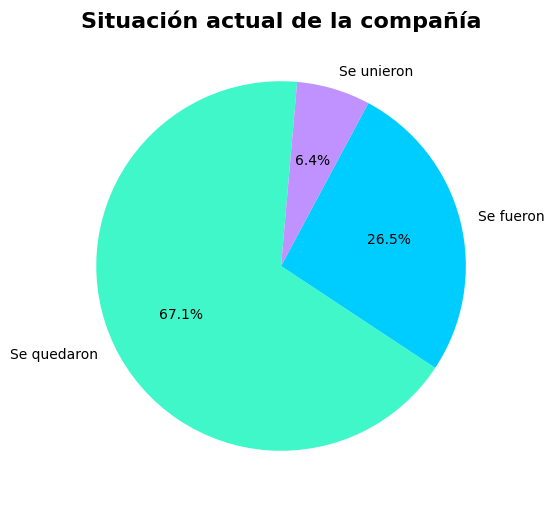

In [21]:
# Contamos los estados de los clientes
counts = df["Estado del cliente"].value_counts()

# Elegimos los colores y labels del gráfico
colors = ["#40f7ca", "#00cdff","#c092ff" ]
labels = ['Se quedaron', 'Se fueron', 'Se unieron']

# Creamos la figura y la personalizamos
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(counts.values, labels=labels, colors=colors, autopct="%1.1f%%", startangle=85)
ax.set_title("Situación actual de la compañía", fontsize=16, fontweight="bold")
plt.show()

### GRÁFICO 2: Motivo de abandono de los clientes
Este gráfico de sectores nos permite ver cual ha sido el motivo de abandono de los clientes y cuál es el porcentaje de clientes que abandono por cada motivo.


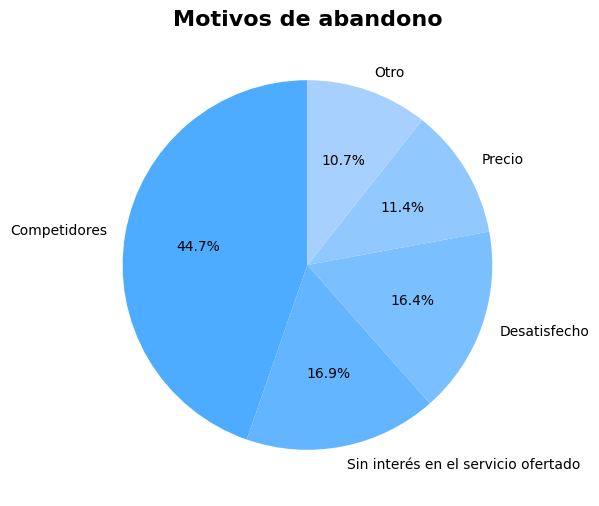

In [22]:
#Seleccionamos solo los clientes que abandonaron la empresa
counts = df.loc[df["Categoría de churn"] != "No", "Categoría de churn"].value_counts()

# Elegimos los colores y labels del gráfico
colors = ["#4DACFF", "#63B5FF", "#7ABFFF", "#91C9FF", "#A8D0FF"]
labels=['Competidores','Sin interés en el servicio ofertado','Desatisfecho','Precio','Otro']

# Creamos la figura y la personalizamos
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(counts.values,labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.set_title("Motivos de abandono", fontsize=16, fontweight="bold")
plt.show()

### GRÁFICO 3: Número de clientes y satisfacción media por tipo de clientes

En este gráfico combinado con doble eje Y se compara el número de clientes de cada categoría con un gráfico de barras (eje de la izquierda) y el nivel de satisfacción medio de cada categoría con un gráfico de líneas (eje de la derecha).


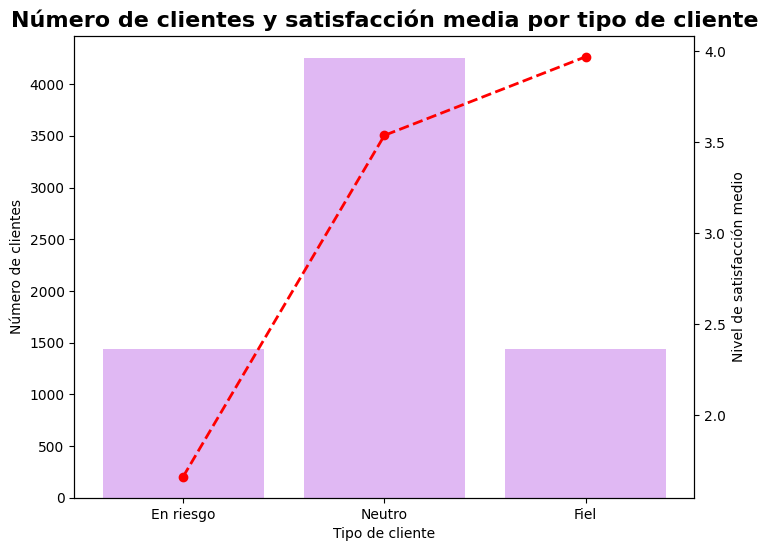

In [23]:
# Se hace una tabla según el nº de clientes por cada tipo y su satisfacción media
counts = df["categoria_cliente"].value_counts()

# Satisfacción media por tipo
satisfaction = df.groupby("categoria_cliente")["Puntuación de satisfacción"].mean()

# Ordenamos categorías en orden lógico
categorias = ["En riesgo", "Neutro", "Fiel"]
counts = counts.loc[categorias]
satisfaction = satisfaction.loc[categorias]

# Creamos la figura y la personalizamos
fig, ax1 = plt.subplots(figsize=(8,6))
#BARRAS: número de clientes
ax1.bar(categorias, counts, alpha=0.7, color="#d39bee")
ax1.set_xlabel("Tipo de cliente")
ax1.set_ylabel("Número de clientes")
#LÍNEA: satisfacción promedio por grupo
ax2 = ax1.twinx()
ax2.plot(categorias, satisfaction, color="red", marker="o", linewidth=2, linestyle="--")
ax2.set_ylabel("Nivel de satisfacción medio")
plt.title("Número de clientes y satisfacción media por tipo de cliente", fontsize=16, fontweight='bold')
plt.show()

### GRÁFICO 4: Distribución de cargos totales por nivel de satisfacción

En este gráfico de violín se compara la puntuación de satisfacción de cada cliente con los cargos totales.


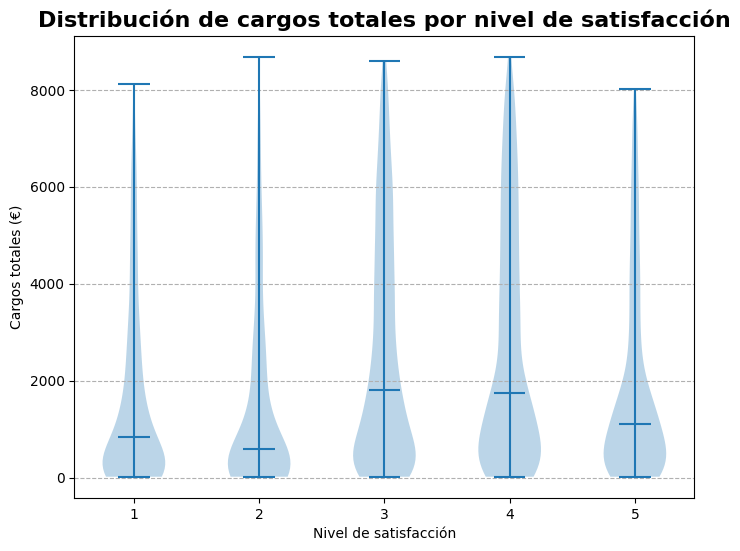

In [24]:
# Agrupamos los cargos totales según el nivel de satisfacción según el nivel de satisfacción
niveles = sorted(df["Puntuación de satisfacción"].unique())
datos = []
for nivel in niveles:
    datos_nivel = df[df["Puntuación de satisfacción"] == nivel]["Cargos totales"]
    datos.append(datos_nivel)

# Creamos la figura y la personalizamos
fig, ax = plt.subplots(figsize=(8,6))
ax.violinplot(datos, showmedians=True)
ax.set_xticks(range(1, len(niveles)+1), niveles)
ax.set_xlabel("Nivel de satisfacción")
ax.set_ylabel("Cargos totales (€)")
ax.set_title("Distribución de cargos totales por nivel de satisfacción", fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--')
plt.show()

### GRÁFICO 5: Nivel de satisfacción según tipo de contrato

En este gráfico de barras apiladas se compara el nivel de satisfacción de los clientes según el tipo de contrato que tienen (mes a mes, anual o cada dos años). Cada barra representa un tipo de contrato y está dividida en secciones que muestran la proporción de clientes en cada nivel de satisfacción.

Este gráfico permite identificar patrones claros, como si un tipo de contrato tiende a tener clientes más satisfechos o más insatisfechos. Además, facilita la comparación entre contratos y puede señalar oportunidades de mejora en la experiencia del cliente o en la oferta de contratos.


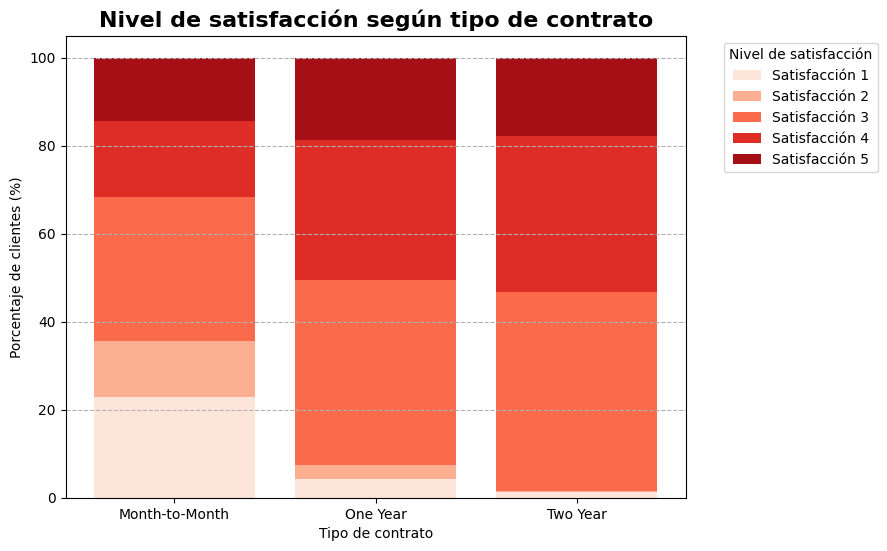

In [25]:
# Se crea una tabla donde las columnas son el tipo de contrato y el contenido el % de clientes según su nivel de satisfacción
tabla = pd.crosstab(df["Contrato"], df["Puntuación de satisfacción"], normalize='index') * 100

# Creamos la figura y la personalizamos
# Cada barra es un tipo de contrato y dentro se distribuyen los porcentajes por nivel de satisfacción
fig, ax = plt.subplots(figsize=(8,6))
colores = ['#fee5d9','#fcae91','#fb6a4a','#de2d26','#a50f15']  # tonos rojos para 1 a 5
# Bottom empieza en cero para todas las barras y se hace un bucle para apilar (ChatGPT)
bottom = np.zeros(len(tabla))
for i, nivel in enumerate(tabla.columns):
    ax.bar(tabla.index,
           tabla[nivel],
           bottom=bottom,
           color=colores[i],
           label=f"Satisfacción {nivel}")
    bottom += tabla[nivel]
ax.set_ylabel("Porcentaje de clientes (%)")
ax.set_xlabel("Tipo de contrato")
ax.set_title("Nivel de satisfacción según tipo de contrato", fontsize=16, fontweight='bold')
ax.legend(title="Nivel de satisfacción", bbox_to_anchor=(1.05, 1))
ax.grid(axis='y', linestyle='--')
plt.show()

### GRÁFICO 6: Mapa de calor de churn según segmento de población y tipo de contrato

En este gráfico se visualiza como varía la tasa de churn en función de dos variables: el tipo de contrato que tienen y el entorno donde vive el cliente.


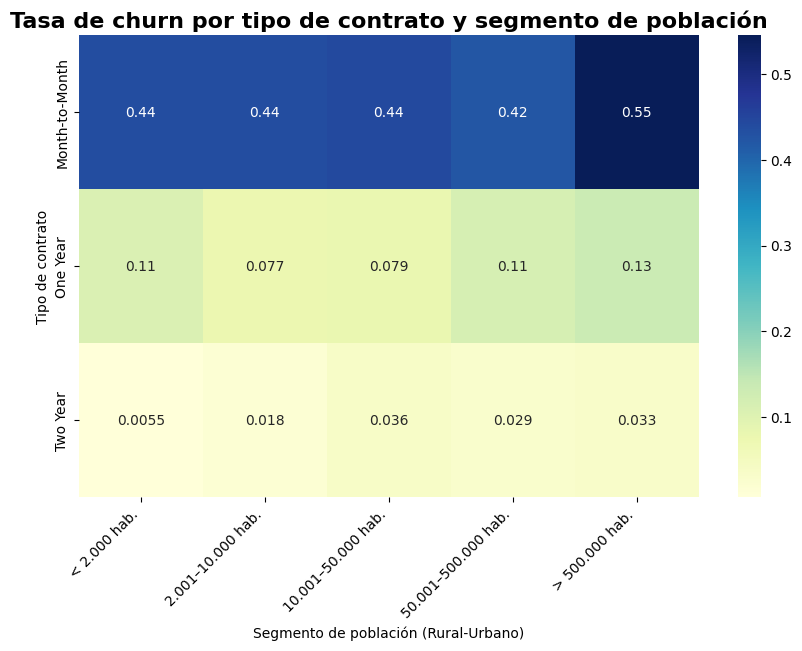

In [26]:
# Se crea la tabla con churn rate (media de churn_bin) por tipo de contrato y entorno donde vive el cliente (Seg_pob)
# Cada celda muestra el % de abandono medio para ese tipo de contrato y entorno
tabpob = df.pivot_table(index="Contrato",
                        columns="Seg_pob",
                        values="churn_bin",
                        aggfunc="mean")
#Se crea una lista con las categorías que representan la variable (Seg_pob) para mejor interpretabilidad
valhab = ["< 2.000 hab.","2.001–10.000 hab.","10.001–50.000 hab.","50.001–500.000 hab.","> 500.000 hab."]

# Creamos la figura y la personalizamos
plt.figure(figsize=(10,6))
sns.heatmap(tabpob, annot=True, cmap="YlGnBu")
plt.title("Tasa de churn por tipo de contrato y segmento de población", fontsize=16, fontweight='bold')
plt.xlabel("Segmento de población (Rural-Urbano)")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=valhab, rotation=45, ha="right")
plt.ylabel("Tipo de contrato")
plt.show()

### GRÁFICO 7: Número de clientes y antiguedad media por tipo de cliente

En este gráfico combinado con doble eje Y se compara el número de clientes de cada categoría con un gráfico de barras (eje de la izquierda) y los meses de antigüedad medios de cada categoría con un gráfico de línea (eje de la derecha).

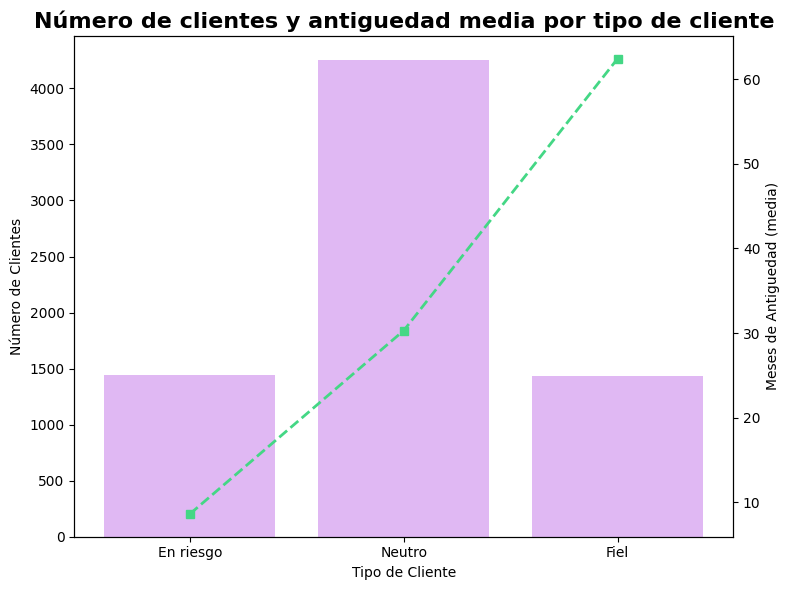

In [27]:
# Número de clientes
counts = df["categoria_cliente"].value_counts()
# Satisfacción media por tipo
antiguedad = df.groupby("categoria_cliente")["Antiguedad en Meses"].mean()

# Ordenamos categorías en orden lógico
categorias = ["En riesgo", "Neutro", "Fiel"]
counts = counts.loc[categorias]
antiguedad = antiguedad.loc[categorias]

# Creamos la figura y la personalizamos
fig, ax1 = plt.subplots(figsize=(8,6))
# BARRAS: número de clientes
ax1.bar(categorias, counts, alpha=0.7, color="#d39bee")
ax1.set_xlabel("Tipo de Cliente")
ax1.set_ylabel("Número de Clientes")
# LÍNEA: antigüedad promedia por grupo
ax2 = ax1.twinx()
ax2.plot(categorias, antiguedad, color="#44d785", marker="s", linewidth=2, linestyle="--")
ax2.set_ylabel("Meses de Antiguedad (media)")
plt.title("Número de clientes y antiguedad media por tipo de cliente", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### GRÁFICO 8: Ratio de abandono por tipo de contrato y de oferta
Este mapa de calor muestra cómo varía el porcentaje de clientes que abandonan según la combinación de dos variables clave: Tipo de Contrato (eje izquierdo), tasa de abandono (eje derecho) y oferta recibida.


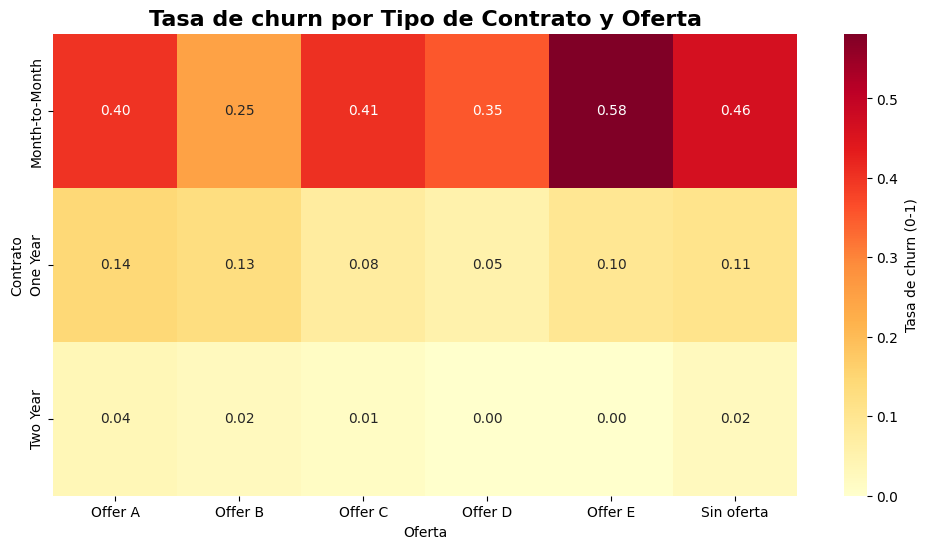

In [28]:
# Se crea la tabla con churn rate (media de churn_bin) por contrato y oferta
pivot = df.pivot_table(index='Contrato', columns='Oferta', values='churn_bin', aggfunc='mean')

# Creamos la figura y la personalizamos
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Tasa de churn (0-1)'})
plt.title("Tasa de churn por Tipo de Contrato y Oferta", fontsize=16, fontweight='bold')
plt.ylabel("Contrato")
plt.xlabel("Oferta")
plt.show()


### GRÁFICO 9: Valor vs Satisfacción
Este gráfico relaciona tres dimensiones clave del cliente:

- Eje X: Índice de Valor (valor económico + engagement)

- Eje Y: Puntuación de Satisfacción

- Tamaño de burbuja: Cargos Totales

- Color: categoría_cliente (Fiel / Neutro / En Riesgo)

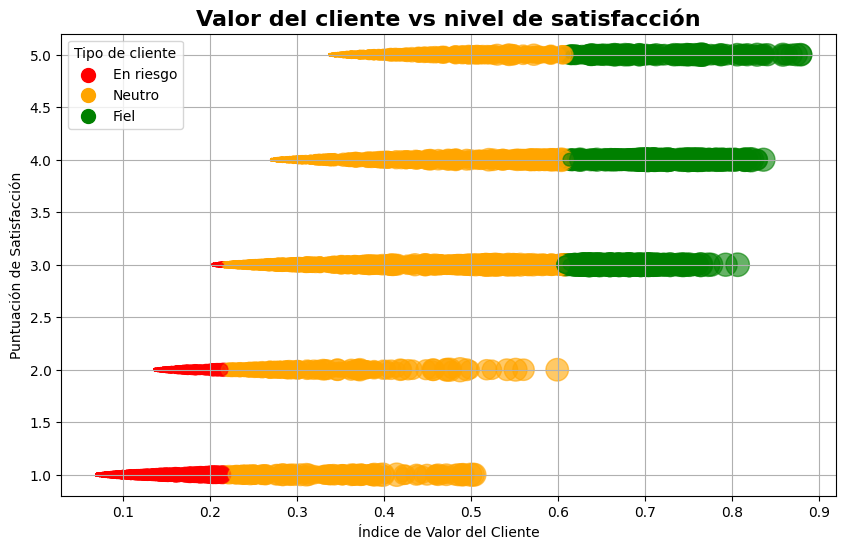

In [29]:
# Tamaño de burbuja: escalar cargos totales
dfgr=df.copy()
dfgr["tam"] = df["Cargos totales"] / df["Cargos totales"].max() * 300

# Color según categoría (simple)
colores = {"En riesgo": "red",
           "Neutro": "orange",
           "Fiel": "green"}
dfgr["color"] = df["categoria_cliente"].map(colores)

# Creamos la figura a y la personalizamos
plt.figure(figsize=(10,6))
plt.scatter(dfgr["indice_valor"],                      # eje X
            dfgr["Puntuación de satisfacción"],        # eje Y
            s=dfgr["tam"],                             # tamaño burbuja
            c=dfgr["color"],                           # color
            alpha=0.6)                               # transparencia
plt.xlabel("Índice de Valor del Cliente")
plt.ylabel("Puntuación de Satisfacción")
plt.title("Valor del cliente vs nivel de satisfacción", fontsize=16, fontweight='bold')
for nombre, color in colores.items():                # Leyenda
    plt.scatter([], [], s=100, c=color, label=nombre)
plt.legend(title="Tipo de cliente")
plt.grid()
plt.show()

# FASE 3: Modelo de Deep Learning de predicción de churn

In [30]:
print("Dataset final:")
print(df.head())
print(df.info)
print(df['churn_bin'])

Dataset final:
  Customer ID  Genero  Edad Casado  Número de Dependientes       Ciudad  \
0  8779-QRDMV    Male    78     No                       0  Los Angeles   
1  7495-OOKFY  Female    74    Yes                       1  Los Angeles   
2  1658-BYGOY    Male    71     No                       3  Los Angeles   
3  4598-XLKNJ  Female    78    Yes                       1    Inglewood   
4  4846-WHAFZ  Female    80    Yes                       1     Whittier   

   Número de Referidos  Antiguedad en Meses      Oferta  Servicio Telefónico  \
0                    0                    1  Sin oferta                    0   
1                    1                    8     Offer E                    1   
2                    0                   18     Offer D                    1   
3                    1                   25     Offer C                    1   
4                    1                   37     Offer C                    1   

   ...  churn_bin  tipo_contrato cargos_norm  dep_nor

In [31]:
# Pasar variables nominales a numéricas para su uso en la red neuronal
df['Genero'] = df['Genero'].map({'Male': 1, 'Female': 0})
df['Casado'] = df['Casado'].map({'Yes': 1, 'No': 0})
df['Oferta'] = df['Oferta'].map({'Offer A': 0, 'Offer B': 1, 'Offer C': 2,'Offer D': 3, 'Offer E': 4, 'Sin oferta': 5})
df['Metodo de pago'] = df['Metodo de pago'].map({'Bank Withdrawal': 1,'Mailed Check':2, 'Credit Card': 0})
df['Contrato'] = df['Contrato'].map({'Month-to-Month': 0,'One Year':1, 'Two Year': 2})
df['Tipo de Internet'] = df['Tipo de Internet'].map({'DSL': 1,'Cable':3,'Fiber Optic':2, 'No internet': 0})


In [33]:
#Se eliminan las columnas que aportan información redundante y se crean las variables: objetivo(target) y predictora(features)
columnas_excluir = ['indice_descuentos','cargos_norm','Customer ID','churn_bin','categoria_descuento','Ciudad','Estado del cliente', 'Categoría de churn','dep_norm', 'ref_norm', 'sat_norm', 'ant_norm', 'cont_norm','indice_valor', 'categoria_cliente']
X = df.drop(columns=columnas_excluir)
y = df['churn_bin']
print(X.shape)

(7130, 31)


In [34]:
#Se dividen los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [35]:
# Se estandarizan los datos de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(36, activation='relu', input_shape=(31,)),  # Capa densa 1 con 36 neuronas y función de activación ReLU (la entrada es de 32 features)
    tf.keras.layers.BatchNormalization(),  # Capa de Batch Normalization
    tf.keras.layers.Dense(18, activation='relu'),   # Capa densa 2 con 18 neuronas y función de activación ReLU
    tf.keras.layers.BatchNormalization(),  # Capa de Batch Normalization
    tf.keras.layers.Dense(1, activation='sigmoid') # Capa de salida con 1 neurona y función de activación Sigmoid, que permite ver las posibilidades de churn
])

In [41]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Función de pérdida para clasificación binaria
    metrics=['accuracy', tf.keras.metrics.AUC()]  # Métricas útiles
)

In [42]:
#Entrenamiento
model.fit(X_train_scaled, y_train, epochs=10, batch_size=31)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6968 - auc_1: 0.7905 - loss: 0.5667
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9185 - auc_1: 0.9646 - loss: 0.2430
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9408 - auc_1: 0.9804 - loss: 0.1611
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9411 - auc_1: 0.9820 - loss: 0.1510
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9515 - auc_1: 0.9902 - loss: 0.1173
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9486 - auc_1: 0.9871 - loss: 0.1225
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9501 - auc_1: 0.9865 - loss: 0.1295
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9534 - auc_1: 0.9887 - loss: 0.1155
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9484 - auc_1: 0.9884 - loss: 0.1179
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9567 - auc_1: 0

In [43]:
# Realizar predicciones en el conjunto de datos de prueba
y_pred = model.predict(X_test_scaled)
print(y_pred)

#Se calculan indicadores relacionados con la efectividad del modelo
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print("Threshold óptimo:", best_threshold)
print("F1-score:", f1_scores[best_index])
print("Recall:", recall[best_index])
print("Precision:", precision[best_index])


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.00874061]
 [0.00486259]
 [0.0174622 ]
 ...
 [0.12105646]
 [0.99932295]
 [0.99981594]]
Threshold óptimo: 0.34667027
F1-score: 0.9310954063104239
Recall: 0.931095406360424
Precision: 0.931095406360424


In [44]:
#Se usa el Threshold óptimo para predecir si ese cliente se va a ir o no.
y_pred = (y_pred > best_threshold).astype(int)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [45]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1573
           1       0.93      0.93      0.93       566

    accuracy                           0.96      2139
   macro avg       0.95      0.95      0.95      2139
weighted avg       0.96      0.96      0.96      2139

[[1534   39]
 [  40  526]]


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


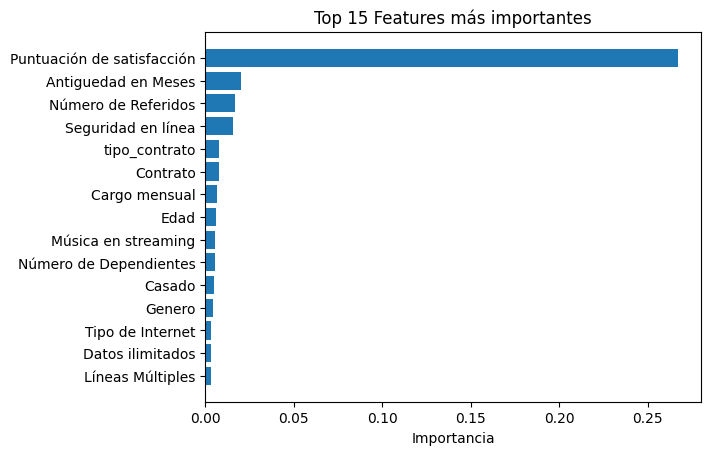

In [46]:
def score_function(estimator, X, y_true):
    # estimator es tu modelo
    # X son las features
    # y_true son las etiquetas reales
    y_pred_proba = estimator.predict(X)
    y_pred = (y_pred_proba > best_threshold).astype(int).flatten()
    return accuracy_score(y_true, y_pred)

result = permutation_importance(
    model,
    X_test_scaled,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring=score_function,
    n_jobs=-1
)

# Visualizar
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

plt.barh(feature_importance['feature'][:15],
         feature_importance['importance'][:15])
plt.xlabel('Importancia')
plt.title('Top 15 Features más importantes')
plt.gca().invert_yaxis()
plt.show()